# Working with Multi[ple Well Log Files with Welly



In [17]:
# importing modules
from welly import Project
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
# Loading well using Project
wells = Project.from_las('../Data/inputs/WellyData/*.las')

4it [00:07,  1.99s/it]


# Well Meta Data


In [32]:
# viewing contents of wells
wells

Index,UWI,Data,Curves
0,L05-B-01,5 curves,"GR, DT, RHOB, DRHO, NPHI"
1,L06-06,5 curves,"GR, DT, RHOB, DRHO, NPHI"
2,L06-07,5 curves,"GR, DT, RHOB, DRHO, NPHI"
3,L07-01,4 curves,"GR, DT, RHOB, NPHI"


In [33]:
# Calling UWIs
wells.uwis

['L05-B-01', 'L06-06', 'L06-07', 'L07-01']

In [34]:
# print individual well details
for well in wells:
    print(well)

Well(uwi: 'L05-B-01', name: 'L05-B-01', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Well(uwi: 'L06-06', name: 'L06-06', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Well(uwi: 'L06-07', name: 'L06-07', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Well(uwi: 'L07-01', name: 'L07-01', 4 curves: ['GR', 'DT', 'RHOB', 'NPHI'])


In [40]:
# print well name and location

for well in wells:
    print(f'{well.uwi} \t {well.location.latitude} \t {well.location.longitude}'.expandtabs(10))

L05-B-01   53.705031           4.603479
L06-06     53.808408           4.672192
L06-07     53.706549           4.898703
L07-01     53.722768           4.796468


In [44]:
# Create dataframe of well header information

well_dict = {}
for well in wells:
    well_dict[well.uwi] = {'well name' : well.uwi,
                           'Longitude' : well.location.longitude,
                           'Latitude' : well.location.latitude}
    
wells_df = pd.DataFrame.from_dict(well_dict, orient='index')
wells_df.reset_index(inplace=True)
wells_df.rename(columns={'index' : 'UWI'}, inplace=True)

In [45]:
wells_df

,UWI,well name,Longitude,Latitude
0,L05-B-01,L05-B-01,4.603479,53.705031
1,L06-06,L06-06,4.672192,53.808408
2,L06-07,L06-07,4.898703,53.706549
3,L07-01,L07-01,4.796468,53.722768


# **Mapping the Well Locations**


In [46]:
import folium

In [48]:
# calling map
mean_lat = wells_df['Latitude'].mean()
mean_long = wells_df['Longitude'].mean()
m = folium.Map(location=[mean_lat,mean_long], zoom_start=7)
#adding markers

for index,well_location in wells_df.iterrows():
    folium.Marker([well_location['Latitude'], well_location['Longitude']],
                  popup=well_location['well name']).add_to(m)
m


# Plotting Curves from Multiple Wells

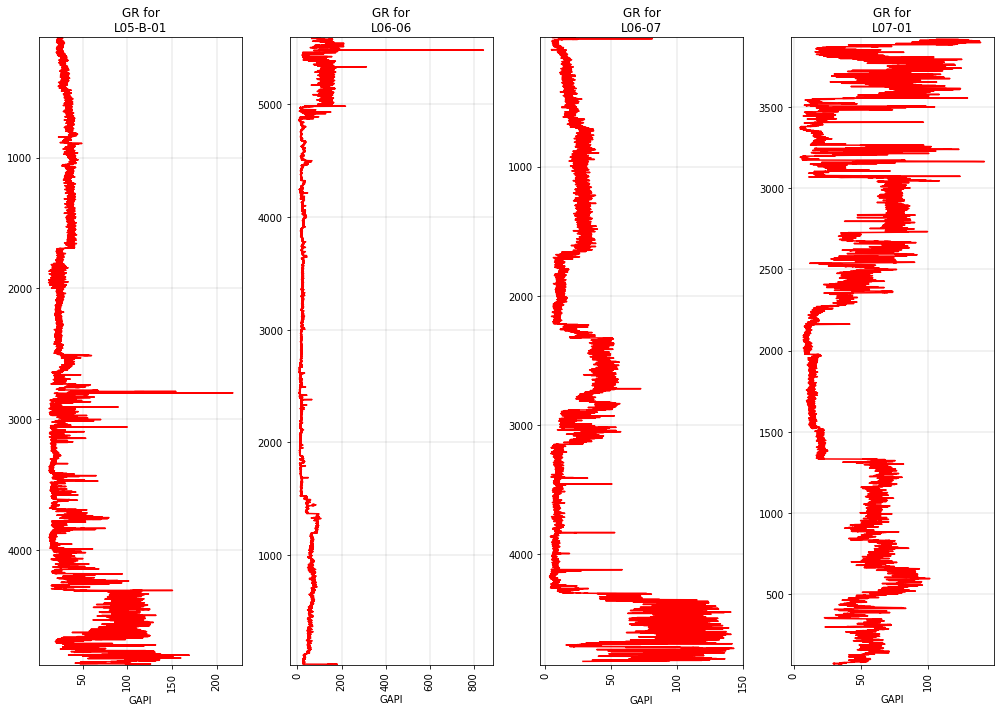

In [51]:
# plot GR from all wells

fig,axs = plt.subplots(figsize=(14,10), ncols=len(wells))

for (ax,well) in zip(axs,wells):
    gr = well.get_curve('GR')
    if gr is not None:
        ax=gr.plot(ax=ax, c='red')
    ax.set_title(f'GR for\n{well.uwi}')
    
plt.tight_layout()
plt.show()

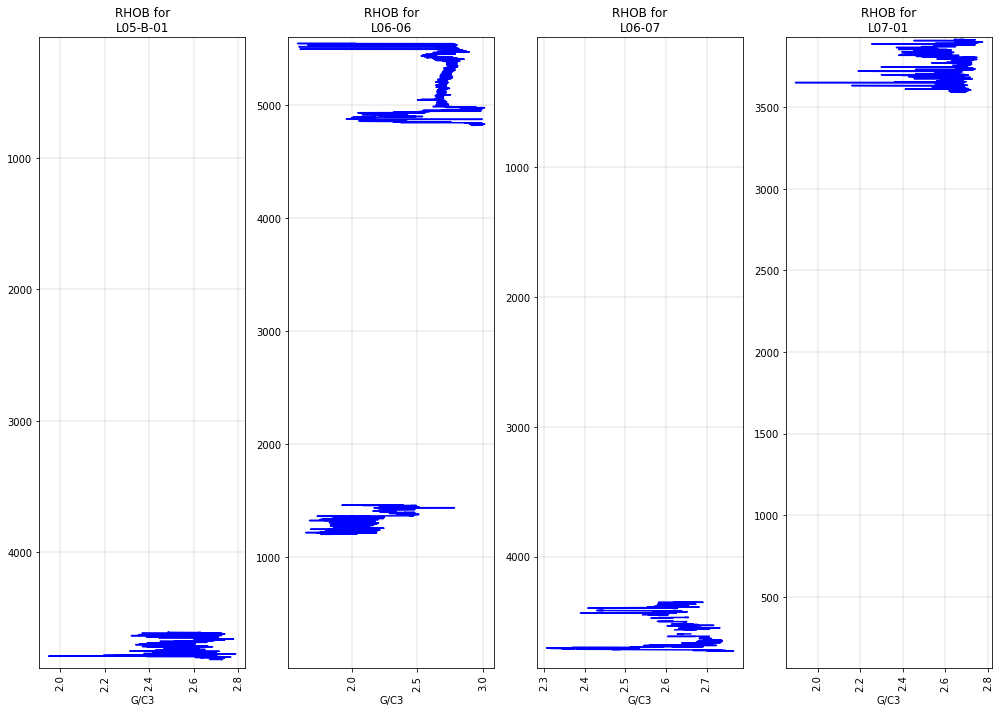

In [52]:
# plot GR from all wells

fig,axs = plt.subplots(figsize=(14,10), ncols=len(wells))
curve_name='RHOB'

for (ax,well) in zip(axs,wells):
    rhob = well.get_curve(curve_name)
    if rhob is not None:
        ax=rhob.plot(ax=ax, c='blue')
    ax.set_title(f'{curve_name} for\n{well.uwi}')
    
plt.tight_layout()
plt.show()

# Multiple Well Log Data Quality

In [53]:
import welly.quality as wq
from IPython.display import HTML

In [54]:
tests= {'Each': [wq.no_flat,
                 wq.no_gaps,
                 wq.not_empty],
        'GR': [wq.all_positive,
               wq.all_between(0,250),
               wq.check_units(['API','GAPI']),
               ],
        'RHOB': [
            wq.all_positive,
            wq.all_between(1.5,3),
            wq.check_units(['G/CC', 'g/cm3'])
        ]}

In [55]:
data_qc_table = wells.curve_table_html(keys=['GR', 'RHOB'], tests=tests)
HTML(data_qc_table)

Idx,UWI,Data,Passing,GR,RHOB
,,,%,4/4 wells,4/4 wells
0,L05-B-01,2/5 curves,92,GR⬤36.02 GAPI,RHOB⬤2.56 G/C3
1,L06-06,2/5 curves,58,GR⬤43.65 GAPI,RHOB⬤2.52 G/C3
2,L06-07,2/5 curves,83,GR⬤28.73 GAPI,RHOB⬤2.62 G/C3
3,L07-01,2/4 curves,83,GR⬤46.86 GAPI,RHOB⬤2.61 G/C3


In [56]:
qc_dict = {}
for well in wells:
    qc_dict[well.uwi] = well.qc_table_html(tests)

In [57]:
# checking test per well
HTML(qc_dict['L07-01'])

Curve,Passed,Score,no_gaps,all_between,no_flat,check_units,all_positive,not_empty
GR,5 / 6,0.833,False,True,True,True,True,True
DT,2 / 3,0.667,False,,True,,,True
RHOB,5 / 6,0.833,True,True,True,False,True,True
NPHI,3 / 3,1.000,True,,True,,,True


In [58]:
HTML(qc_dict['L06-06'])

Curve,Passed,Score,no_gaps,all_between,no_flat,check_units,all_positive,not_empty
GR,4 / 6,0.667,False,False,True,True,True,True
DT,2 / 3,0.667,False,,True,,,True
RHOB,3 / 6,0.500,False,False,True,False,True,True
DRHO,2 / 3,0.667,False,,True,,,True
NPHI,2 / 3,0.667,False,,True,,,True


# Well Data to Dataframe

In [59]:
df = wells.df()

In [60]:
df

GR  DT  RHOB  DRHO  NPHI
UWI      DEPT                                 
L05-B-01 81.0        NaN NaN   NaN   NaN   NaN
         82.0        NaN NaN   NaN   NaN   NaN
         83.0  23.235703 NaN   NaN   NaN   NaN
         84.0  22.028881 NaN   NaN   NaN   NaN
         85.0  24.331657 NaN   NaN   NaN   NaN
...                  ...  ..   ...   ...   ...
L07-01   68.9        NaN NaN   NaN   NaN   NaN
         67.9        NaN NaN   NaN   NaN   NaN
         66.9        NaN NaN   NaN   NaN   NaN
         65.9        NaN NaN   NaN   NaN   NaN
         64.9        NaN NaN   NaN   NaN   NaN

[19090 rows x 5 columns]

In [61]:
df.loc['L06-06']

,GR,DT,RHOB,DRHO,NPHI
DEPT,,,,,
5594.2,NaN,65.364883,NaN,NaN,NaN
5593.2,NaN,64.244064,NaN,NaN,NaN
5592.2,NaN,63.408592,NaN,NaN,NaN
5591.2,NaN,64.532288,NaN,NaN,NaN
5590.2,NaN,65.439606,NaN,NaN,NaN
...,...,...,...,...,...
29.2,151.118591,NaN,NaN,NaN,NaN
28.2,148.454224,NaN,NaN,NaN,NaN
27.2,158.078278,NaN,NaN,NaN,NaN


# Summary:
We have seen how to use welly to explore details of multiple well log files, plotting well locations on map, getting to visualize same curve for all wells and how to save that info to dataframe.

**Author:**\
Dilshad Raza\
07/25/2022